In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\arrag\AppData\Local\Temp\ipykernel_4072\2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## DATA RAPRESENTETION

In [3]:
wine_dataframe = pd.read_csv('winequality_red.csv')
wine_dataframe = wine_dataframe.rename(columns=lambda x: x.replace(" ", "_"))
wine_dataframe.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,NaN,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,NaN,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## DATA RESTORATION

In [4]:
wine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1507 non-null   float64
 1   volatile_acidity      1524 non-null   float64
 2   citric_acid           1508 non-null   float64
 3   residual_sugar        1519 non-null   float64
 4   chlorides             1502 non-null   float64
 5   free_sulfur_dioxide   1505 non-null   float64
 6   total_sulfur_dioxide  1517 non-null   float64
 7   density               1530 non-null   float64
 8   pH                    1515 non-null   float64
 9   sulphates             1514 non-null   float64
 10  alcohol               1526 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


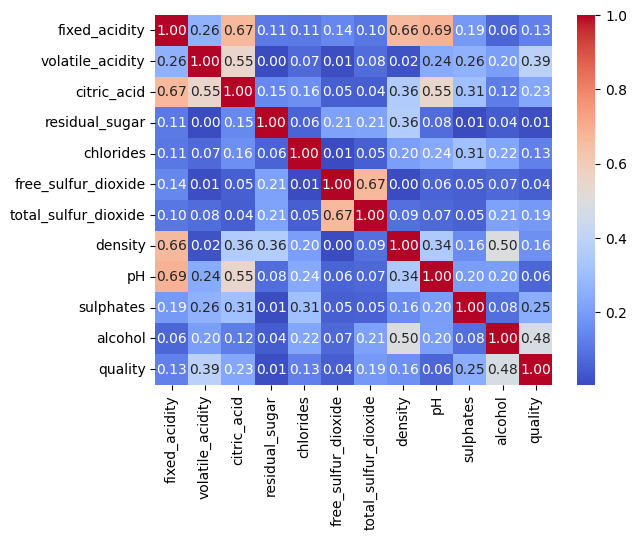

In [5]:
corr_matrix = wine_dataframe.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [6]:
corr_index = np.where((np.triu(corr_matrix, k=1) > 0.30)) # correlated index features

corr_features = pd.DataFrame({
    'Feature1': corr_matrix.columns[corr_index[0]], #Feature1
    'Feature2': corr_matrix.columns[corr_index[1]], #Feature2
    'Correlazione': corr_matrix.values[corr_index]
})

corr_matrix
corr_features

,Feature1,Feature2,Correlazione
0,fixed_acidity,citric_acid,0.669252
1,fixed_acidity,density,0.662714
2,fixed_acidity,pH,0.688157
3,volatile_acidity,citric_acid,0.549842
4,volatile_acidity,quality,0.388285
5,citric_acid,density,0.356892
6,citric_acid,pH,0.546903
7,citric_acid,sulphates,0.309268
8,residual_sugar,density,0.360104
9,chlorides,sulphates,0.309055


## Data Restoration Process

The restoration of:
1. **Citric Acid**
2. **Density**
3. **pH**
4. **Sulfurs**
5. **Acidity**
6. **Volatile Acidity**
7. **Alchool**
8. **Density**
9. **Sugar**
10. **Chlorides**
11. **Sulphates**


In [7]:
data_copy=wine_dataframe.copy()
sequence = data_copy.isna().any(axis=1)
data_copy[sequence]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,NaN,5
2,7.8,0.760,0.04,NaN,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,NaN,0.52,9.9,5
16,8.5,NaN,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,NaN,3.38,0.50,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,NaN,0.99574,3.42,0.75,11.0,6
1593,6.8,NaN,0.08,1.9,0.068,NaN,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.550,0.10,NaN,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,NaN,0.99574,3.42,0.75,11.0,6


In [8]:

def restore_function(first_corr_label,second_corr_label,miss_label,delta, dataframe):
    df_miss = dataframe[dataframe[miss_label].isna()]
    for count, value in enumerate(df_miss[first_corr_label]):
        indx=df_miss[first_corr_label].index[count]
        if pd.isna(value):
            if pd.isna(second_corr_label):
               dataframe.loc[indx,miss_label] = round(dataframe[miss_label].mean(skipna=True),2)
               print('entrato')
            else: 
                new_value=dataframe.loc[indx,second_corr_label]
                correlated=dataframe[
                    (dataframe[second_corr_label] >= new_value*(1-delta)) &
                    (dataframe[second_corr_label] <= new_value*(1+delta))]
                dataframe.loc[indx,miss_label] = round(correlated[miss_label].mean(skipna=True),2)
        else:
            correlated=dataframe[
                (dataframe[first_corr_label] >= value*(1-delta)) &
                (dataframe[first_corr_label] <= value*(1+delta))]
            dataframe.loc[indx,miss_label] = round(correlated[miss_label].mean(skipna=True), 2)
    print(miss_label,'has been restored')
    return dataframe

In [9]:
miss_label = list(set(corr_features['Feature1']).union(set(corr_features['Feature2'])))
# Calcola il numero di corrispondenze per ciascuna etichetta
correspondence_count = []
for label in miss_label:
    count = ((corr_features['Feature1'] == label) | (corr_features['Feature2'] == label)).sum()
    correspondence_count.append(count)

# Crea un DataFrame con le etichette e il numero di corrispondenze
correspondence_df = pd.DataFrame({'Label': miss_label, 'Correspondence_Count': correspondence_count})

# Ordina miss_label in base al numero di corrispondenze
miss_label = correspondence_df.sort_values(by='Correspondence_Count', ascending=False)['Label'].tolist()
print(miss_label)
corr_features

['citric_acid', 'density', 'fixed_acidity', 'pH', 'alcohol', 'quality', 'volatile_acidity', 'sulphates', 'free_sulfur_dioxide', 'residual_sugar', 'chlorides', 'total_sulfur_dioxide']


,Feature1,Feature2,Correlazione
0,fixed_acidity,citric_acid,0.669252
1,fixed_acidity,density,0.662714
2,fixed_acidity,pH,0.688157
3,volatile_acidity,citric_acid,0.549842
4,volatile_acidity,quality,0.388285
5,citric_acid,density,0.356892
6,citric_acid,pH,0.546903
7,citric_acid,sulphates,0.309268
8,residual_sugar,density,0.360104
9,chlorides,sulphates,0.309055


In [10]:
for label in miss_label:
    #Inserisce le label da sostituire in Feature1 di relevant row
    relevant_rows = corr_features[(corr_features['Feature1'] == label) | (corr_features['Feature2'] == label)]
    swap_mask = relevant_rows['Feature2'] == label
    relevant_rows.loc[swap_mask, ['Feature1', 'Feature2']] = relevant_rows.loc[swap_mask, ['Feature2', 'Feature1']].values
    relevant_rows = relevant_rows.sort_values(by='Correlazione', ascending=False)
    relevant_rows.reset_index(drop=True, inplace=True)
    try:
        second_corr_label_value = relevant_rows.iloc[1]['Feature2']
    except IndexError:
        second_corr_label_value = np.nan   #add a nan row
        relevant_rows.loc[len(relevant_rows)] = np.nan
    restore_function(relevant_rows.iloc[0]['Feature2'],relevant_rows.iloc[1]['Feature2'] ,label,0.05,data_copy)
    

citric_acid has been restored
density has been restored
fixed_acidity has been restored
pH has been restored
alcohol has been restored
quality has been restored
volatile_acidity has been restored
sulphates has been restored
entrato
entrato
entrato
entrato
entrato
entrato
entrato
free_sulfur_dioxide has been restored
residual_sugar has been restored
chlorides has been restored
total_sulfur_dioxide has been restored


In [11]:
na_seq=data_copy.isna().any(axis=1)
data_copy[na_seq]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


In [13]:
data_copy.to_csv('restore_winedata.csv', index=False)

wine_dataframe_original=pd.read_csv('archive/winequality-red.csv')
dataframe = wine_dataframe.copy()
sequence=dataframe['citric_acid'].isna()
W1=wine_dataframe_original[sequence]
df_miss = dataframe[sequence]

for delta in np.arange(0,0.51,0.05):
    for count, value in enumerate(df_miss['fixed_acidity']):
        indx=df_miss['fixed_acidity'].index[count]
        if pd.isna(value):
            new_value=dataframe.loc[indx,'pH']
            correlated=dataframe[
                (dataframe['pH'] >= new_value*(1-delta)) &
                (dataframe['pH'] <= new_value*(1+delta))]
            dataframe.loc[indx,'citric_acid'] = round(correlated['citric_acid'].mean(skipna=True),2)
        else:
            correlated=dataframe[
                (dataframe['fixed_acidity'] >= value*(1-delta)) &
                (dataframe['fixed_acidity'] <= value*(1+delta))]
            dataframe.loc[indx,'citric_acid'] = round(correlated['citric_acid'].mean(skipna=True), 2)

